# <center>Лабораторная работа №1</center>
## <center>Распределенные вычисления и параллельное программирование</center>
### <center>Гавриков Илья Сергеевич МСУ-201</center>

In [1]:
# Импорт либ
import pandas as pd
from joblib import Parallel, delayed
from glob import glob

# список файлов
tests = ["5", "8", "10", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26"]
files = ['tests\\test_'+x+'.csv' for x in tests]
results = ['tests\\bpresult_'+x+'.csv' for x in tests]


def knapSack(items):
    """
    :param items: [capacity, weights, values, N]  
    :return: best_value_cost, fractions
    """
    W = items[0]
    wt = items[1]
    val = items[2]
    n = items[3]

    K = [[0 for x in range(int(W) + 1)] for x in range(n + 1)]

    # Создаем таблицу кэша K[][] bottom up и далее динамическое программирование 
    for i in range(n + 1):
        for w in range(int(W) + 1):
            
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][int(w-wt[i-1])], K[i-1][w]) #если вес предмета меньше веса столбца,
                                                                            #максимизируем значение суммарной ценности
            else:
                K[i][w] = K[i-1][w] #если вес предмета больше вес столбца,
                                    #забираем значение ячейки из предыдущей строки
            
    best_combination = [0] * n
    result = K[n][int(W)]
    cap_copy = W
    for i in range(n, 0, -1):
        if round(result) != round(K[i - 1][int(cap_copy)]):
            best_combination[i - 1] = 1
            result -= val[i - 1]
            cap_copy -= wt[i - 1]
    return K[n][int(W)], best_combination
    
#читаем данные
data=[]
for file in files:
    test = pd.read_csv(file, names=['weights', 'values'], delimiter=";")
    N = test.shape[0]
    weights = test['weights'].tolist()
    values = test['values'].tolist()
    capacity = test['weights'].sum() / 2
    data.append([capacity, weights, values, N])
    
from time import time
deltas = []
for job in range(1,9):
    start = time()
    res = Parallel(n_jobs=job)(delayed(knapSack)(d) for d in data) #параллелизация
    delta = time() - start
    deltas.append(delta)

In [2]:
fractions = [x[1] for x in res]

In [4]:
import numpy as np
for r in range(len(results)):
    resu = pd.read_csv(results[r], sep=';', header=None)
    frac = resu.loc[0].values.tolist()
    try:
        np.testing.assert_allclose(frac, fractions[r])
    except AssertionError:
        print(results[r])
        print('result: ', frac)
        print('test: ', fractions[r], '\n')

In [5]:
differ = pd.DataFrame()
differ['time'] = deltas
differ['diff'] = differ['time'][0] / differ['time']
differ

,time,diff
0,2.952124,1.000000
1,3.327530,0.887182
2,3.129290,0.943385
3,2.296739,1.285355
4,2.147248,1.374841
5,2.406766,1.226594
6,2.294205,1.286774
7,2.483461,1.188714


In [6]:
import matplotlib.pyplot as plt

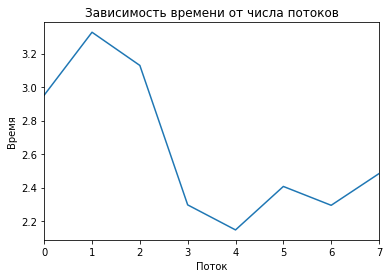

In [7]:
differ['time'].plot(title='Зависимость времени от числа потоков')
plt.xlabel('Поток')
plt.ylabel('Время')
plt.show()

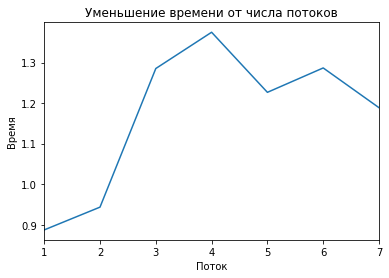

In [8]:
differ['diff'][1:].plot(title='Уменьшение времени от числа потоков')
plt.xlabel('Поток')
plt.ylabel('Время')
plt.show()

То же самое, но на 50 тестах

In [9]:
data=[]
for file in files:
    test = pd.read_csv(file, names=['weights', 'values'], delimiter=";")
    N = test.shape[0]
    weights = test['weights'].tolist()
    values = test['values'].tolist()
    capacity = test['weights'].sum() / 2
    data.append([capacity, weights, values, N])

# генерируем новые тесты
nums = 50
gen_w = []
gen_v = []
for i in range(27, nums):
    gen_w.append([np.random.uniform(10,1000) for x in range(i)])
    gen_v.append([np.random.uniform(10,1000) for x in range(i)])

data_gen = [[np.sum(gen_w[i]) / 2, gen_w[i], gen_v[i], len(gen_v[i])] for i in range(len(gen_v))]
for i in data_gen:
    data.append(i)
    
from time import time
deltas = []
for job in range(1,9):
    start = time()
    res = Parallel(n_jobs=job)(delayed(knapSack)(d) for d in data)
    delta = time() - start
    deltas.append(delta)

In [10]:
differ1 = pd.DataFrame()
differ1['time'] = deltas
differ1['diff'] = differ1['time'][0] / differ1['time']
differ1

,time,diff
0,20.225879,1.000000
1,15.632426,1.293841
2,12.354645,1.637107
3,9.255764,2.185220
4,5.220192,3.874547
5,4.045223,4.999941
6,4.787636,4.224607
7,5.944717,3.402328


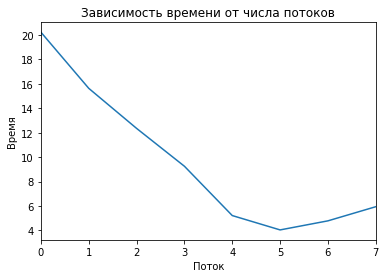

In [11]:
differ1['time'].plot(title='Зависимость времени от числа потоков')
plt.xlabel('Поток')
plt.ylabel('Время')
plt.show()

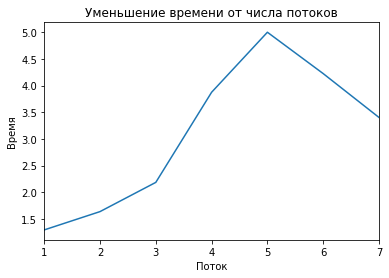

In [12]:
differ1['diff'][1:].plot(title='Уменьшение времени от числа потоков')
plt.xlabel('Поток')
plt.ylabel('Время')
plt.show()

Видим, что при увеличении числа тестов, параллелизация вычислений позволяет действительно ускорить процесс выполнения, а при маленьких значениях только замедляет

### Simple recursion

In [14]:
def knapsack(V, W, C):
    return knapsack_aux(V, W, len(V)-1, C)

def knapsack_aux(V, W, i, aW):
    if i == -1 or aW == 0:
        return 0
    elif W[i] > aW:
         return knapsack_aux(V, W, i-1, aW)
    else:
        return max(knapsack_aux(V, W, i-1, aW), V[i] + knapsack_aux(V, W, i-1, aW-W[i]))

In [15]:
for file in files:
    test = pd.read_csv(file, names=['weights', 'values'], delimiter=";")
    weights = test['weights'].tolist()
    values = test['values'].tolist()
    capacity = test['weights'].sum() / 2
    print(file+ ' ' + str(knapsack(values, weights, capacity)))

tests\test_5.csv 1261.420767
tests\test_8.csv 2435.97696
tests\test_10.csv 3755.763412
tests\test_14.csv 4990.724634000001
tests\test_15.csv 6716.335913
tests\test_16.csv 5838.18097
tests\test_17.csv 6834.00367576087
tests\test_18.csv 7482.99115736099
tests\test_19.csv 7855.367567510842
tests\test_20.csv 7574.904870963749
tests\test_21.csv 9409.5453713559
tests\test_22.csv 9189.727849324545
tests\test_23.csv 9299.48190067703
tests\test_24.csv 8647.909360136739
tests\test_25.csv 9605.3033187574
tests\test_26.csv 11130.85964625838
